In [1]:
!pip install -q statsmodels 
!pip install -q mplcursors
!pip install -q altair
!pip install -q pydataset

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
import mplcursors
import altair

    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)

In [3]:
columns = ["mpg",
           "cylinders" ,
           "displacement",
           "horsepower",
           "weight",
           "acceleration",
           "model year",
           "origin",
           "car name"
          ]

In [4]:
df = pd.read_csv("./auto/auto-mpg.data", names=columns, comment="\t", sep="\s+", skipinitialspace=True)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


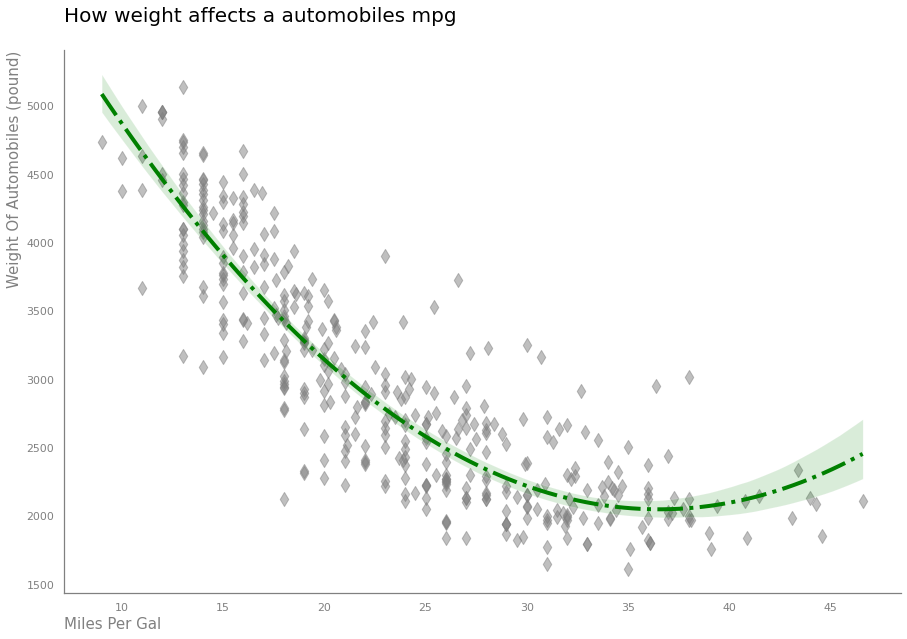

In [5]:
sns.set(rc = {'figure.figsize':(15,10)})

sns.set_style(style={'axes.edgecolor': 'gray','axes.facecolor': 'white','xtick.color': 'gray','ytick.color': 'gray' })

axis = sns.regplot(data=df,
                   x="mpg",
                   y="weight", 
                   order=2,
                   marker="d",
                   scatter_kws={"s":100, "alpha":0.5, "color":"gray"},
                   line_kws={"color":"green", "lw":4, "linestyle": "-."})

sns.despine()

plt.grid(visible=False)

plt.ylabel("Weight Of Automobiles (pound)",
           loc="top",
           fontsize = 15,
           color = "gray")

plt.xlabel("Miles Per Gal",
           loc="left",
           fontsize = 15,
           color="gray")

plt.title("How weight affects a automobiles mpg\n",
          fontsize = 20,
          loc = "left",
          color = "black");

# Altair

In [6]:
from pydataset import data
import altair as alt

df2=data("Duncan")

In [7]:
df2.head()

,type,income,education,prestige
accountant,prof,62,86,82
pilot,prof,72,76,83
architect,prof,75,92,90
author,prof,55,90,76
chemist,prof,64,86,90


# Basic Plots

Grammar of Graphics
<ul>
    <li> Data
    <li> Aesthetics
    <li> Scale
    <li> Statistical Transformation
    <li> Geometric objects
    <li> facets
    <li> Coordinate system
</ul>

In [8]:
alt.Chart(df2).mark_bar().encode(x="type",
                                y="prestige")

alt.Chart(...)

In [9]:
alt.Chart(df2).mark_circle().encode(x="education",
                                   y="prestige")

alt.Chart(...)

# Color

In [10]:
alt.Chart(df2).mark_circle().encode(x="education",
                                   y="prestige",
                                   color="type",
                                   size="income")

alt.Chart(...)

# Regression

In [11]:
chart = alt.Chart(df2).mark_point().encode(x="education",
                                         y="prestige", 
                                         color="type:N",
                                         tooltip="income")

chart + chart.transform_regression("education","prestige").mark_line()

alt.LayerChart(...)

In [12]:
# Multiple Plots

education_plot = alt.Chart(df2).mark_circle().encode(x="education", y="prestige", color="type")

income_plot = alt.Chart(df2).mark_circle().encode(x="income",y="prestige",color="type")

education_plot | income_plot

alt.HConcatChart(...)

# HTML interactive Plot

In [13]:
interact_plot = alt.Chart(df2).mark_circle().encode(x="education",
                                                   y="prestige",
                                                   color="type",
                                                   tooltip=["income"]
                                                  )

interact_plot.save("interact_plot.html",
                   embed_options={"render":"svg","actions":False}
                  )

In [14]:
interact_plot

alt.Chart(...)

# Altair Visualization Grammer <br>

<ul>
    <li>Data
    <li>Mark
    <li>Encoding
    <li>Transform
    <li>Scale
    <li>Guide
</ul>


### Data
> #### Tabular Data
>> Rows and Columns

Data in this form is called "Tidy" data in Altair the data can be a csv, json, ur a url pointing to the data

### Marks
> ### Example of Marks
>>  <ul>
        <li> line
        <li> Point
        <li> Area
        <li> Bar
    </ul>

Marks are the gemoetrics objects that we draw on the screen

### Encoding
> Channel<br>
> Variables

Encoding are one of the most important concepts in Altair's visualization grammer, an encoding is essentially a "Mapping" between the visual properties of a mark and the variables of the data. These visual properties sometimes referred to as encoding channels include x-position, y-position, color, size, ect ... each of these channels can be mapped to a column in the data to establish anencoding. The mapping of visual properties to data is key in creating meaningful visualizations

### Transform
> calculate<br>
> Filter<br>
> Aggregrate<br>
> Fold

Altair can also preform many transformations on the data before being visualized. New variables can be calculated, filters can be applied, and even more advanced calculations such as aggregations and folds can be performed all within the visualization specificatioin. Not all all visualizations require transformations but they allow for specifications to do a lot more than only define encodings, to complete the visualization grammer

### Scale
> f(domain) -> range
> f(transform> -> computer screen

A scale is nothing more than a function.
The Scale determins where to draw the marks or what color to make them based on the encodings. 

### Guide

Guids are useful visual aids often visualizing a scale. For instance the tick marks on the x and y axis are guides for their respective scales. similary Legend is a visual aid for categorical variables . Altair creates scales and guids automatically with sensible defaults though they can customize if needed.

1) examine your data. (is it "tidy" (tabular))
2) choose a mark. 
> example: <code> alt.Chart(df).mark_point()</code><br>
3) encoding makes it more interesting. We can map channels to x, y or both
> example: <code> alt.Chart(df).mark_point().encode(x="miles_per_gal") </code>

In [15]:
df.head(1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu


In [19]:
#2
alt.Chart(df).mark_circle()


alt.Chart(...)

In [20]:
#3
alt.Chart(df).mark_point().encode(x="mpg", y="horsepower", color ="cylinders")


alt.Chart(...)

In [21]:
# 4) Transformations (filter)
alt.Chart(df).mark_point().encode(x="mpg",
                                  y="horsepower",
                                  color ="cylinders").transform_filter(alt.datum.cylinders <5)

alt.Chart(...)

# Tidy data 

Altair has 4 data types that we can visualize
<ul> 
    <li> Qualtitative: discrete/continious (Qualitative data describes qualities or characteristics. )
    <li> Ordinal: (Ordinal data is a categorical, statistical data type where the variables have natural, ordered categories and the distances between the categories are not ...)
    <li> Nominal (Nominal data is data that can be labelled or classified into mutually exclusive categories within a variable. )
    <li> Temporal (space time/ time series)

## Quantitative:Q <br>
> discrete or continouse numbers that are measured

## Ordinal <br>
> discreted ordered quantities. They are essentially lables that have a natural/intrensic order
>> small, mid, larg<br>
>> cold, hot<br>
>> age can be grouped

## Nominal 
> Discrete unorded categlories
>> names and types of animals

## Temporal:T<br>
> They are simply date or time values

## Geopgraphic

In [27]:
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite


In [34]:
# hp changed over time
alt.Chart(df).mark_circle().encode(x="mpg:Q", y="horsepower:Q", color="model year:N")

alt.Chart(...)